In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
from gmdhpy.gmdh import Regressor

In [3]:
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_predictions1(test, predicted):
    sns.set(style="whitegrid", font_scale=1.2)  # Set the style and font scale

    plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

    # Plotting the actual values
    sns.lineplot(data=test, color='red', linewidth=2, label='Real SPI')

    # Plotting the predicted values
    sns.lineplot(data=predicted, color='blue', linewidth=2, label='Predicted SPI')

    # Customizing the plot
    plt.title('SPI Value Prediction', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SPI', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adding eye-catching elements
    plt.fill_between(range(len(test)), test, predicted, color='gray', alpha=0.2)
    plt.axvline(x=50, color='green', linestyle='--', linewidth=1.5)
    plt.text(50, max(test), 'Prediction Start', color='green', fontsize=12)

    # Adjusting the plot appearance
    sns.despine()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [5]:
import matplotlib.pyplot as plt

def plot_predictions2(test, predicted):
    plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

    # Plotting the actual values
    plt.plot(test, color='red', linewidth=1.5, label='Real SPI')

    # Plotting the predicted values
    plt.plot(predicted, color='blue', linewidth=1.5, label='Predicted SPI')

    # Customizing the plot
    plt.title('SPI Value Prediction', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SPI', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adding eye-catching elements
    plt.fill_between(range(len(test)), test, predicted, color='gray', alpha=0.2)
    plt.axvline(x=50, color='green', linestyle='--', linewidth=1.5)
    plt.text(50, max(test), 'Prediction Start', color='green', fontsize=12)

    # Adjusting the plot appearance
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [6]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real SPI')
    plt.plot(predicted, color='blue',label='Predicted SPI')
    plt.title('SPI Value Prediction')
    plt.xlabel('Time')
    plt.ylabel('SPI')
    plt.legend()
    plt.figure(figsize=(16,4))
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    print("The MSE is {}".format(mean_squared_error(test, predicted)))
    print("The MAE is {}".format(mean_absolute_error(test, predicted)))
    print("The R2_Score is {}".format(r2_score(test, predicted)))

In [7]:
# First, we get the data
dataset = pd.read_csv(r"C:\Users\asitg\Desktop\intern_pkd\exp_fs\Bhawanipatna\wavelet_Bhawanipatna.csv")
dataset.head()

,spi,Approximation,D 1,D 2,D 3,D 4,D 5,D 6,D 7
0,-0.20,-0.05,-0.15,0.35,-0.89,-0.18,-0.46,0.11,0.05
1,-0.04,-0.06,-0.14,0.36,-0.92,-0.14,-0.42,0.14,0.06
2,0.33,-0.08,-0.10,0.20,-0.71,-0.03,-0.33,0.20,0.07
3,0.70,-0.08,-0.02,-0.14,-0.35,0.13,-0.23,0.24,0.08
4,0.96,-0.08,0.04,-0.38,0.08,0.28,-0.15,0.26,0.09


In [8]:
X = dataset[['Approximation', 'D 1','D 2', 'D 3', 'D 5']].values  # Select the desired features
y = dataset.iloc[:, 0].values  # Target variable (SPI)


In [9]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [10]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create separate variables for the combined datasets
training_set = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
test_set = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
training_set

array([[ 0.2 ,  0.08, -0.08, -0.38,  0.11, -0.02],
       [ 0.18,  0.13,  0.15,  0.16, -0.27,  0.26],
       [ 0.07,  1.02,  1.23, -0.54, -0.06, -0.55],
       ...,
       [ 0.19, -0.12,  0.07, -0.74, -0.11, -0.71],
       [ 0.06, -0.13, -2.57,  0.72,  0.08,  0.29],
       [ 0.08,  0.13, -0.01,  0.97,  0.09,  1.23]])

In [11]:
# # Checking for missing values
# training_set = dataset[:'2016'].iloc[:,1:2].values
# test_set = dataset['2017':].iloc[:,1:2].values

In [12]:
# # We have chosen 'High' attribute for prices. Let's see what it looks like
# dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
# dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
# plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
# plt.title('CSCO stock price')
# plt.show()

In [13]:
# # Scaling the training set
# sc = MinMaxScaler(feature_range=(0,1))
# training_set_scaled = sc.fit_transform(training_set)
# # print(training_set_scaled.shape)
# print(training_set.shape)
# print(test_set.shape)

In [14]:
# X_train = []
# y_train = []
# for i in range(60,training_set.shape[0]):
#     X_train.append(training_set[i-20:i,0])
#     y_train.append(training_set[i,0])
# X_train, y_train = np.array(X_train), np.array(y_train)
# print(X_train.shape)
# print(y_train.shape)

In [15]:
gmdh = Regressor(ref_functions=('cubic','quadratic','linear','linear_cov'),
                      criterion_type='validate',
                      criterion_minimum_width=5,
                      stop_train_epsilon_condition=0.00001,
                      layer_err_criterion='top',
                      l2=0.5,
                      verbose=1,
                      n_jobs='max')

In [16]:
# # Now to get the test set ready in a similar way as the training set.
# # The following has been done so first 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# # 'High' attribute data for processing
# # dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
# inputs = X_train
# # print(inputs.shape)
# inputs = inputs.reshape(-1,1)
# print(inputs.shape)

# # print(inputs.shape)
# # inputs  = sc.transform(inputs)
# # print(inputs.shape)
# print(X_test.shape)

In [17]:
# Preparing X_test and predicting the prices
# X_test = []
# y_test = []
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-20:i,0])
#     y_test.append(inputs[i,0])
# X_test, y_test = np.array(X_test), np.array(y_test)
# print(X_test.shape)
# print(y_test.shape)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(392, 5)
(392,)
(98, 5)
(98,)


In [18]:
gmdh.fit(X_train,y_train)

train layer0 in 3.39 sec
train layer1 in 0.11 sec
train layer2 in 0.11 sec
train layer3 in 0.10 sec
train layer4 in 0.10 sec
train layer5 in 0.10 sec
train layer6 in 0.08 sec
train layer7 in 0.08 sec
train layer8 in 0.10 sec
train layer9 in 0.08 sec
train layer10 in 0.12 sec
train layer11 in 0.11 sec
train layer12 in 0.10 sec
train layer13 in 0.12 sec
train layer14 in 0.08 sec
train layer15 in 0.23 sec
train layer16 in 0.08 sec
train layer17 in 0.08 sec
train layer18 in 0.11 sec
train layer19 in 0.14 sec


In [19]:
final_predictions = gmdh.predict(X_test)
print(final_predictions.shape)
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price.reshape(-1,1)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(98,)


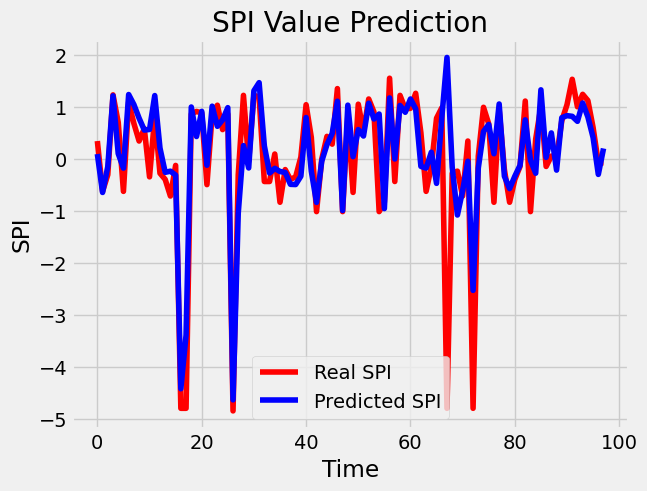

<Figure size 1600x400 with 0 Axes>

In [20]:
plot_predictions(y_test,final_predictions)

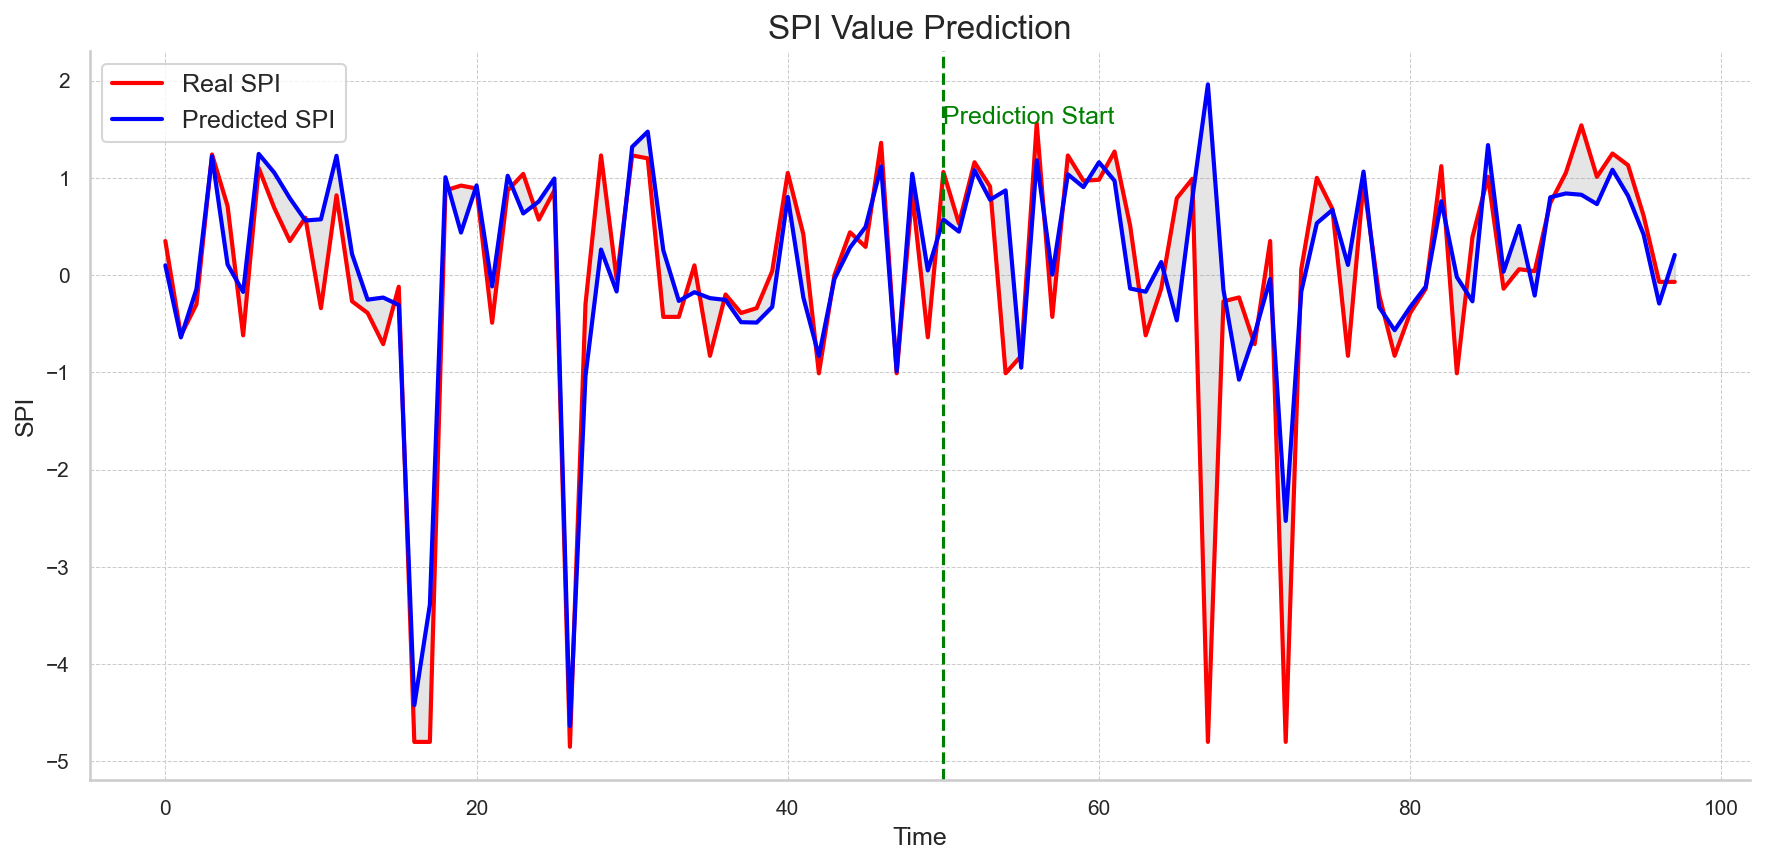

In [21]:
plot_predictions1(y_test,final_predictions)

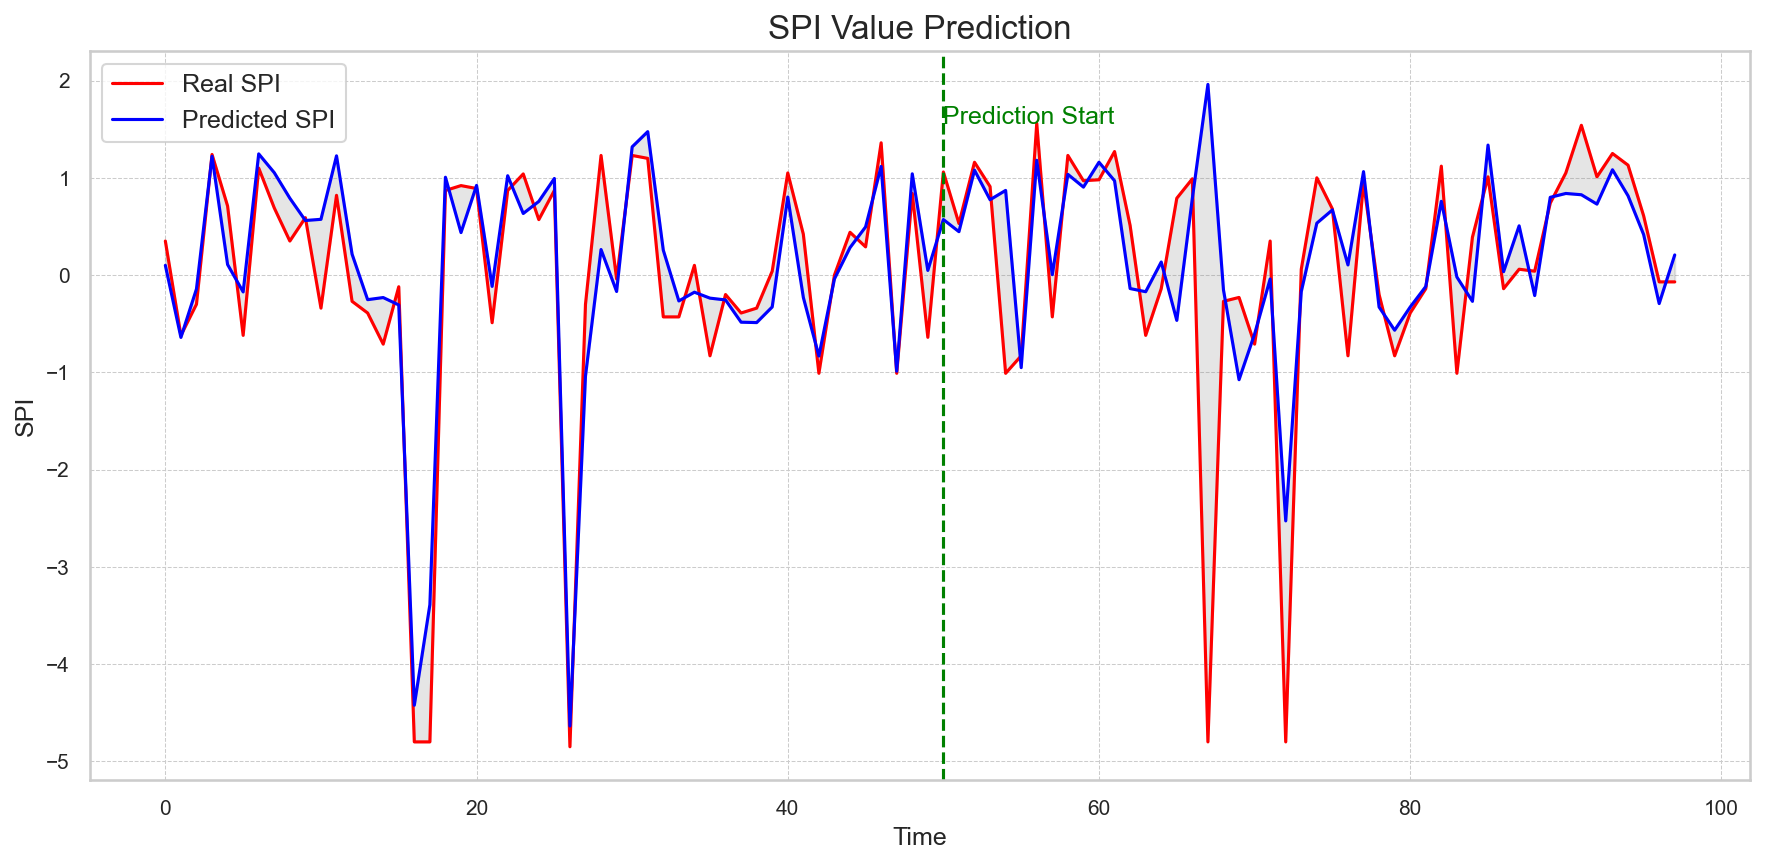

In [22]:
plot_predictions2(y_test,final_predictions)

In [23]:
return_rmse(y_test,final_predictions)

The root mean squared error is 0.8551537088401032.
The MSE is 0.7312878657429841
The MAE is 0.42582888826145626
The R2_Score is 0.5832434742042871


In [24]:
from sklearn.metrics import r2_score
y_test, final_predictions = list(y_test),list(final_predictions)
# gmdh.score(y_test, predicted_stock_price)
r2_score(y_test, final_predictions)

0.5832434742042871

In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [26]:
evaluation_metrics = calculate_evaluation_metrics(y_test, final_predictions)
print(evaluation_metrics)


{'ME': -0.10920030788032076, 'MAE': 0.42582888826145626, 'MSE': 0.7312878657429841, 'RMSE': 0.8551537088401032, 'NRMSE': 0.13340931495165417, 'PBIAS': -298.9282171025541, 'RSR': 0.6455668251976032, 'rSD': 0.640281740609913, 'NSE': 0.5832434742042871, 'mNSE': 0.5832434742042871, 'rNSE': 0.33238692365754213, 'd': 0.8654373785861128, 'md': 0.8654373785861128, 'rd': 0.8654373785861128, 'cp': 0.8654373785861128, 'r': 0.8654373785861128, 'R2': 0.5832434742042871}


In [28]:
k=11
print(y_test[k],final_predictions[k])


0.82 1.2259828078952673


In [29]:
# # Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# # So for each element of training set, we have 60 previous training set elements 
# X_train = []
# y_train = []
# for i in range(60,2769):
#     X_train.append(training_set_scaled[i-60:i,0])
#     y_train.append(training_set_scaled[i,0])
# X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [31]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=900,batch_size=32)

Epoch 1/900
13/13 [==============================] - 9s 14ms/step - loss: 1.1532
Epoch 2/900
13/13 [==============================] - 0s 13ms/step - loss: 1.1422
Epoch 3/900
13/13 [==============================] - 0s 12ms/step - loss: 1.1401
Epoch 4/900
13/13 [==============================] - 0s 16ms/step - loss: 1.1439
Epoch 5/900
13/13 [==============================] - 0s 13ms/step - loss: 1.1429
Epoch 6/900
13/13 [==============================] - 0s 15ms/step - loss: 1.1414
Epoch 7/900
13/13 [==============================] - 0s 14ms/step - loss: 1.1440
Epoch 8/900
13/13 [==============================] - 0s 16ms/step - loss: 1.1360
Epoch 9/900
13/13 [==============================] - 0s 18ms/step - loss: 1.1382
Epoch 10/900
13/13 [==============================] - 0s 13ms/step - loss: 1.1308
Epoch 11/900
13/13 [==============================] - 0s 14ms/step - loss: 1.1343
Epoch 12/900
13/13 [==============================] - 0s 16ms/step - loss: 1.1232
Epoch 13/900
13/13 [=====

13/13 [==============================] - 0s 31ms/step - loss: 0.2534
Epoch 102/900
13/13 [==============================] - 0s 31ms/step - loss: 0.2552
Epoch 103/900
13/13 [==============================] - 0s 30ms/step - loss: 0.2748
Epoch 104/900
13/13 [==============================] - 0s 29ms/step - loss: 0.2812
Epoch 105/900
13/13 [==============================] - 0s 30ms/step - loss: 0.2618
Epoch 106/900
13/13 [==============================] - 0s 29ms/step - loss: 0.2411
Epoch 107/900
13/13 [==============================] - 0s 30ms/step - loss: 0.2467
Epoch 108/900
13/13 [==============================] - 0s 31ms/step - loss: 0.2743
Epoch 109/900
13/13 [==============================] - 0s 31ms/step - loss: 0.2474
Epoch 110/900
13/13 [==============================] - 0s 30ms/step - loss: 0.2591
Epoch 111/900
13/13 [==============================] - 0s 30ms/step - loss: 0.2432
Epoch 112/900
13/13 [==============================] - 0s 30ms/step - loss: 0.2766
Epoch 113/900
13/1

13/13 [==============================] - 0s 31ms/step - loss: 0.1982
Epoch 200/900
13/13 [==============================] - 0s 32ms/step - loss: 0.2047
Epoch 201/900
13/13 [==============================] - 0s 32ms/step - loss: 0.2042
Epoch 202/900
13/13 [==============================] - 0s 31ms/step - loss: 0.2191
Epoch 203/900
13/13 [==============================] - 0s 32ms/step - loss: 0.2061
Epoch 204/900
13/13 [==============================] - 0s 32ms/step - loss: 0.2175
Epoch 205/900
13/13 [==============================] - 0s 31ms/step - loss: 0.2002
Epoch 206/900
13/13 [==============================] - 0s 32ms/step - loss: 0.2265
Epoch 207/900
13/13 [==============================] - 0s 31ms/step - loss: 0.1933
Epoch 208/900
13/13 [==============================] - 0s 29ms/step - loss: 0.1991
Epoch 209/900
13/13 [==============================] - 0s 29ms/step - loss: 0.2036
Epoch 210/900
13/13 [==============================] - 0s 33ms/step - loss: 0.2018
Epoch 211/900
13/1

13/13 [==============================] - 0s 28ms/step - loss: 0.1177
Epoch 298/900
13/13 [==============================] - 0s 31ms/step - loss: 0.1120
Epoch 299/900
13/13 [==============================] - 0s 32ms/step - loss: 0.1135
Epoch 300/900
13/13 [==============================] - 0s 32ms/step - loss: 0.1103
Epoch 301/900
13/13 [==============================] - 0s 31ms/step - loss: 0.1223
Epoch 302/900
13/13 [==============================] - 0s 30ms/step - loss: 0.1267
Epoch 303/900
13/13 [==============================] - 0s 32ms/step - loss: 0.1310
Epoch 304/900
13/13 [==============================] - 0s 31ms/step - loss: 0.1144
Epoch 305/900
13/13 [==============================] - 0s 30ms/step - loss: 0.1129
Epoch 306/900
13/13 [==============================] - 0s 31ms/step - loss: 0.1074
Epoch 307/900
13/13 [==============================] - 0s 30ms/step - loss: 0.1162
Epoch 308/900
13/13 [==============================] - 0s 31ms/step - loss: 0.1107
Epoch 309/900
13/1

13/13 [==============================] - 0s 28ms/step - loss: 0.0918
Epoch 396/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0913
Epoch 397/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0949
Epoch 398/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0876
Epoch 399/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0974
Epoch 400/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0842
Epoch 401/900
13/13 [==============================] - 0s 30ms/step - loss: 0.0909
Epoch 402/900
13/13 [==============================] - 0s 30ms/step - loss: 0.1096
Epoch 403/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0892
Epoch 404/900
13/13 [==============================] - 0s 32ms/step - loss: 0.1070
Epoch 405/900
13/13 [==============================] - 0s 31ms/step - loss: 0.1085
Epoch 406/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0968
Epoch 407/900
13/1

13/13 [==============================] - 0s 30ms/step - loss: 0.1008
Epoch 494/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0765
Epoch 495/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0802
Epoch 496/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0730
Epoch 497/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0786
Epoch 498/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0725
Epoch 499/900
13/13 [==============================] - 1s 42ms/step - loss: 0.0790
Epoch 500/900
13/13 [==============================] - 0s 35ms/step - loss: 0.0784
Epoch 501/900
13/13 [==============================] - 0s 27ms/step - loss: 0.0768
Epoch 502/900
13/13 [==============================] - 0s 30ms/step - loss: 0.0808
Epoch 503/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0767
Epoch 504/900
13/13 [==============================] - 0s 38ms/step - loss: 0.0785
Epoch 505/900
13/1

13/13 [==============================] - 0s 33ms/step - loss: 0.0743
Epoch 592/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0671
Epoch 593/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0728
Epoch 594/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0662
Epoch 595/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0770
Epoch 596/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0639
Epoch 597/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0772
Epoch 598/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0762
Epoch 599/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0731
Epoch 600/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0700
Epoch 601/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0710
Epoch 602/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0715
Epoch 603/900
13/1

13/13 [==============================] - 0s 31ms/step - loss: 0.0648
Epoch 690/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0629
Epoch 691/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0600
Epoch 692/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0691
Epoch 693/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0682
Epoch 694/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0699
Epoch 695/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0626
Epoch 696/900
13/13 [==============================] - 0s 33ms/step - loss: 0.0592
Epoch 697/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0692
Epoch 698/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0622
Epoch 699/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0667
Epoch 700/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0674
Epoch 701/900
13/1

13/13 [==============================] - 0s 28ms/step - loss: 0.0516
Epoch 788/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0505
Epoch 789/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0577
Epoch 790/900
13/13 [==============================] - 0s 34ms/step - loss: 0.0604
Epoch 791/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0542
Epoch 792/900
13/13 [==============================] - 0s 29ms/step - loss: 0.0676
Epoch 793/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0585
Epoch 794/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0619
Epoch 795/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0572
Epoch 796/900
13/13 [==============================] - 0s 30ms/step - loss: 0.0527
Epoch 797/900
13/13 [==============================] - 0s 29ms/step - loss: 0.0612
Epoch 798/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0587
Epoch 799/900
13/1

13/13 [==============================] - 0s 28ms/step - loss: 0.0437
Epoch 886/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0524
Epoch 887/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0556
Epoch 888/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0478
Epoch 889/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0494
Epoch 890/900
13/13 [==============================] - 0s 32ms/step - loss: 0.0471
Epoch 891/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0468
Epoch 892/900
13/13 [==============================] - 0s 29ms/step - loss: 0.0543
Epoch 893/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0525
Epoch 894/900
13/13 [==============================] - 0s 30ms/step - loss: 0.0531
Epoch 895/900
13/13 [==============================] - 0s 31ms/step - loss: 0.0517
Epoch 896/900
13/13 [==============================] - 0s 30ms/step - loss: 0.0498
Epoch 897/900
13/1

In [32]:
# # Now to get the test set ready in a similar way as the training set.
# # The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# # 'High' attribute data for processing
# dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
# inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs  = sc.transform(inputs)

In [33]:
# # Preparing X_test and predicting the prices
# X_test = []
# for i in range(60,311):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [34]:
predicted_spi = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_spi

4/4 [==============================] - 4s 8ms/step


array([[-0.09406182],
       [-0.38677514],
       [-0.07406069],
       [ 1.2579979 ],
       [ 0.49052462],
       [-0.26580435],
       [ 1.1036515 ],
       [ 0.41319928],
       [ 1.0894797 ],
       [ 0.6764125 ],
       [ 0.3626855 ],
       [ 1.1579815 ],
       [-0.12446539],
       [ 0.14996964],
       [ 0.1835334 ],
       [-0.6282047 ],
       [-4.9832034 ],
       [-4.6940017 ],
       [ 0.69134265],
       [ 0.70616925],
       [ 1.1845379 ],
       [ 0.02277159],
       [ 1.1774302 ],
       [ 0.71042687],
       [ 0.7827267 ],
       [ 1.1762506 ],
       [-4.983959  ],
       [-0.3665536 ],
       [-0.2635467 ],
       [-0.26030356],
       [ 1.3655461 ],
       [ 1.2689459 ],
       [-0.28478187],
       [-0.2119762 ],
       [-0.16212186],
       [-0.24907084],
       [-0.01817736],
       [-1.5264434 ],
       [-0.0401084 ],
       [-0.4197137 ],
       [ 1.0278649 ],
       [-0.41305467],
       [-0.56414837],
       [-0.20655176],
       [ 0.33870244],
       [ 0

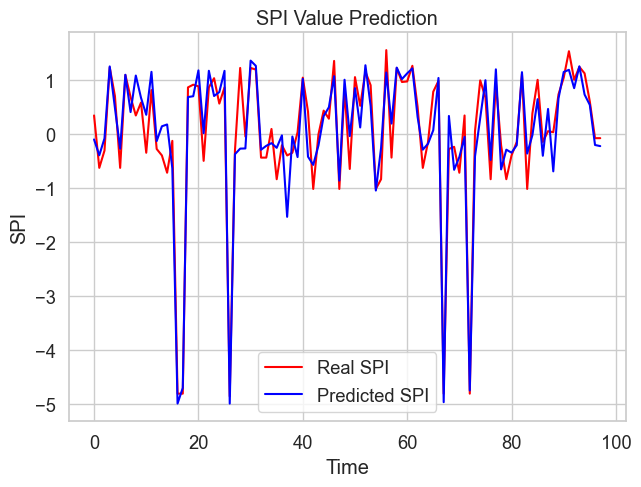

<Figure size 1600x400 with 0 Axes>

In [35]:
# Visualizing the results for LSTM
plot_predictions(y_test,predicted_spi)

In [36]:
# Evaluating our model
return_rmse(y_test,predicted_spi)

The root mean squared error is 0.40331270881005804.
The MSE is 0.16266114108770666
The MAE is 0.3118756769901636
The R2_Score is 0.9073004008171193


In [37]:
evaluation_metrics = calculate_evaluation_metrics(y_test, predicted_spi)
print(evaluation_metrics)

{'ME': 0.008202935986372917, 'MAE': 0.3118756769901636, 'MSE': 0.16266114108770666, 'RMSE': 0.40331270881005804, 'NRMSE': 0.06291929934634291, 'PBIAS': 22.45496443197057, 'RSR': 0.3044660887239837, 'rSD': 1.407350161988759, 'NSE': -193.10593690526886, 'mNSE': -193.10593690526886, 'rNSE': -110.04990393680421, 'd': 0.2929410524889454, 'md': 0.2929410524889454, 'rd': 0.2929410524889454, 'cp': 0.2929410524889454, 'r': 0.2929410524889454, 'R2': 0.9073004008171193}


Truth be told. That's one awesome score. 

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [50]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=1200,batch_size=32)

C:\Users\asitg\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/1200
13/13 [==============================] - 18s 28ms/step - loss: 1.1580
Epoch 2/1200
13/13 [==============================] - 0s 29ms/step - loss: 1.1629
Epoch 3/1200
13/13 [==============================] - 0s 32ms/step - loss: 1.1582
Epoch 4/1200
13/13 [==============================] - 0s 32ms/step - loss: 1.1366
Epoch 5/1200
13/13 [==============================] - 0s 32ms/step - loss: 1.1444
Epoch 6/1200
13/13 [==============================] - 0s 32ms/step - loss: 1.1167
Epoch 7/1200
13/13 [==============================] - 0s 34ms/step - loss: 1.1114
Epoch 8/1200
13/13 [==============================] - 0s 32ms/step - loss: 1.1177
Epoch 9/1200
13/13 [==============================] - 0s 33ms/step - loss: 1.1230
Epoch 10/1200
13/13 [==============================] - 0s 33ms/step - loss: 1.0838
Epoch 11/1200
13/13 [==============================] - 0s 33ms/step - loss: 1.0454
Epoch 12/1200
13/13 [==============================] - 0s 32ms/step - loss: 1.0397
Epoch 13/120

13/13 [==============================] - 0s 31ms/step - loss: 0.3942
Epoch 100/1200
13/13 [==============================] - 0s 33ms/step - loss: 0.3844
Epoch 101/1200
13/13 [==============================] - 0s 33ms/step - loss: 0.4199
Epoch 102/1200
13/13 [==============================] - 0s 34ms/step - loss: 0.3666
Epoch 103/1200
13/13 [==============================] - 0s 34ms/step - loss: 0.3834
Epoch 104/1200
13/13 [==============================] - 0s 33ms/step - loss: 0.3545
Epoch 105/1200
13/13 [==============================] - 0s 34ms/step - loss: 0.3858
Epoch 106/1200
13/13 [==============================] - 0s 34ms/step - loss: 0.3946
Epoch 107/1200
13/13 [==============================] - 0s 33ms/step - loss: 0.3599
Epoch 108/1200
13/13 [==============================] - 0s 34ms/step - loss: 0.3638
Epoch 109/1200
13/13 [==============================] - 0s 33ms/step - loss: 0.3695
Epoch 110/1200
13/13 [==============================] - 0s 33ms/step - loss: 0.3593
Epoch 1

13/13 [==============================] - 0s 30ms/step - loss: 0.2910
Epoch 197/1200
13/13 [==============================] - 0s 32ms/step - loss: 0.2940
Epoch 198/1200
13/13 [==============================] - 0s 26ms/step - loss: 0.2722
Epoch 199/1200
13/13 [==============================] - 0s 27ms/step - loss: 0.2681
Epoch 200/1200
13/13 [==============================] - 0s 30ms/step - loss: 0.2645
Epoch 201/1200
13/13 [==============================] - 0s 27ms/step - loss: 0.2697
Epoch 202/1200
13/13 [==============================] - 0s 29ms/step - loss: 0.2789
Epoch 203/1200
13/13 [==============================] - 0s 31ms/step - loss: 0.2843
Epoch 204/1200
13/13 [==============================] - 0s 34ms/step - loss: 0.2817
Epoch 205/1200
13/13 [==============================] - 0s 34ms/step - loss: 0.3011
Epoch 206/1200
13/13 [==============================] - 0s 33ms/step - loss: 0.2729
Epoch 207/1200
13/13 [==============================] - 0s 32ms/step - loss: 0.2997
Epoch 2

13/13 [==============================] - 0s 12ms/step - loss: 0.2417
Epoch 294/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.2622
Epoch 295/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.2319
Epoch 296/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.2388
Epoch 297/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.2235
Epoch 298/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.2216
Epoch 299/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.2219
Epoch 300/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.2224
Epoch 301/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.2442
Epoch 302/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.2557
Epoch 303/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.2444
Epoch 304/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.2537
Epoch 3

13/13 [==============================] - 0s 12ms/step - loss: 0.2222
Epoch 391/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1960
Epoch 392/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.2014
Epoch 393/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1945
Epoch 394/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.2015
Epoch 395/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.1744
Epoch 396/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1784
Epoch 397/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.2011
Epoch 398/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.2063
Epoch 399/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1967
Epoch 400/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1718
Epoch 401/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.1788
Epoch 4

13/13 [==============================] - 0s 12ms/step - loss: 0.1472
Epoch 488/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1493
Epoch 489/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1463
Epoch 490/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1495
Epoch 491/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1525
Epoch 492/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1459
Epoch 493/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1453
Epoch 494/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1408
Epoch 495/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1264
Epoch 496/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.1299
Epoch 497/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1307
Epoch 498/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1327
Epoch 4

13/13 [==============================] - 0s 12ms/step - loss: 0.1204
Epoch 585/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1264
Epoch 586/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1205
Epoch 587/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1201
Epoch 588/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1262
Epoch 589/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1267
Epoch 590/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1180
Epoch 591/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1310
Epoch 592/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1138
Epoch 593/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1128
Epoch 594/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1266
Epoch 595/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.1216
Epoch 5

13/13 [==============================] - 0s 13ms/step - loss: 0.1231
Epoch 682/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1248
Epoch 683/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1143
Epoch 684/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1143
Epoch 685/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1215
Epoch 686/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1143
Epoch 687/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1295
Epoch 688/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1184
Epoch 689/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1033
Epoch 690/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1252
Epoch 691/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1283
Epoch 692/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1268
Epoch 6

13/13 [==============================] - 0s 12ms/step - loss: 0.1062
Epoch 779/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1063
Epoch 780/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1158
Epoch 781/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1183
Epoch 782/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1079
Epoch 783/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1171
Epoch 784/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1085
Epoch 785/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1013
Epoch 786/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1046
Epoch 787/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1250
Epoch 788/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.1141
Epoch 789/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1070
Epoch 7

13/13 [==============================] - 0s 12ms/step - loss: 0.1135
Epoch 876/1200
13/13 [==============================] - 0s 18ms/step - loss: 0.1059
Epoch 877/1200
13/13 [==============================] - 0s 18ms/step - loss: 0.1028
Epoch 878/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1097
Epoch 879/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1110
Epoch 880/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1041
Epoch 881/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.0997
Epoch 882/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1115
Epoch 883/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0976
Epoch 884/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.1072
Epoch 885/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1104
Epoch 886/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1027
Epoch 8

13/13 [==============================] - 0s 12ms/step - loss: 0.0923
Epoch 973/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.1022
Epoch 974/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1030
Epoch 975/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1077
Epoch 976/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0906
Epoch 977/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0907
Epoch 978/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.1006
Epoch 979/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.0980
Epoch 980/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1000
Epoch 981/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.0997
Epoch 982/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1010
Epoch 983/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.0955
Epoch 9

13/13 [==============================] - 0s 13ms/step - loss: 0.1017
Epoch 1069/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.1004
Epoch 1070/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.0945
Epoch 1071/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.0990
Epoch 1072/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 1073/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0957
Epoch 1074/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.0908
Epoch 1075/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1016
Epoch 1076/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0940
Epoch 1077/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.1037
Epoch 1078/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.1005
Epoch 1079/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0

13/13 [==============================] - 0s 12ms/step - loss: 0.0856
Epoch 1165/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0884
Epoch 1166/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.0905
Epoch 1167/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.0910
Epoch 1168/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.0894
Epoch 1169/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0901
Epoch 1170/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.0882
Epoch 1171/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.0947
Epoch 1172/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0958
Epoch 1173/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0895
Epoch 1174/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.0902
Epoch 1175/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.0

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

In [51]:
# # Preparing X_test and predicting the prices
# X_test = []
# for i in range(60,311):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_spi = regressorGRU.predict(X_test)
# GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
GRU_predicted_spi

4/4 [==============================] - 1s 6ms/step


array([[ 0.14996368],
       [-0.45854264],
       [-0.01151674],
       [ 0.9808724 ],
       [ 0.36832693],
       [-0.42333302],
       [ 1.1327242 ],
       [ 0.87225455],
       [ 0.7026552 ],
       [ 0.6770989 ],
       [ 0.3107394 ],
       [ 0.9257134 ],
       [-0.13384381],
       [-0.18093905],
       [-0.18544278],
       [-0.49848956],
       [-5.1808085 ],
       [-3.6095889 ],
       [ 0.65033317],
       [ 0.3104761 ],
       [ 1.0927941 ],
       [-0.22549072],
       [ 0.92685485],
       [ 0.55251503],
       [ 0.82546747],
       [ 1.0670867 ],
       [-5.1364803 ],
       [-1.4300573 ],
       [ 0.01324502],
       [-0.5134676 ],
       [ 1.1125063 ],
       [ 1.1880971 ],
       [-0.27284822],
       [-0.40788472],
       [-0.353176  ],
       [-0.19963565],
       [-0.406913  ],
       [-0.73556024],
       [-1.5660421 ],
       [-0.38799655],
       [ 0.97810805],
       [-0.3347972 ],
       [-0.55567616],
       [-0.24209386],
       [ 0.5017991 ],
       [ 0

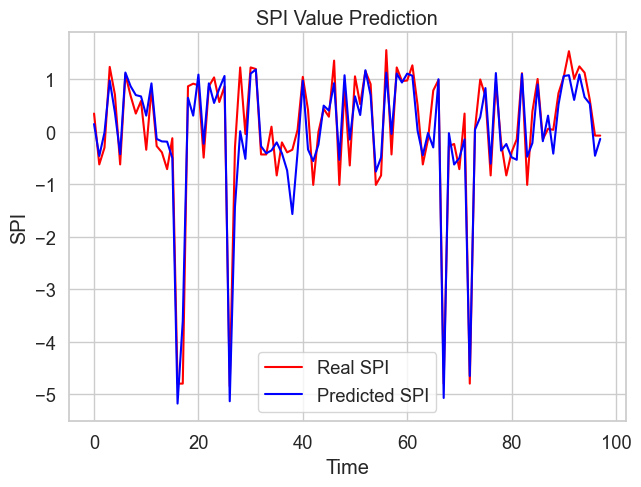

<Figure size 1600x400 with 0 Axes>

In [52]:
# Visualizing the results for GRU
plot_predictions(y_test,GRU_predicted_spi)

In [53]:
# Evaluating GRU
return_rmse(y_test,GRU_predicted_spi)

The root mean squared error is 0.4143057208692027.
The MSE is 0.1716492303449497
The MAE is 0.3177597109775762
The R2_Score is 0.9021781431838894


In [54]:
evaluation_metrics = calculate_evaluation_metrics(y_test, GRU_predicted_spi)
print(evaluation_metrics)

{'ME': 0.07784701623326665, 'MAE': 0.3177597109775762, 'MSE': 0.1716492303449497, 'RMSE': 0.4143057208692027, 'NRMSE': 0.06463427782670869, 'PBIAS': 213.10077069441695, 'RSR': 0.3127648586655965, 'rSD': 1.38665785637636, 'NSE': -187.77481847970537, 'mNSE': -187.77481847970537, 'rNSE': -107.01173183287352, 'd': 0.2939286257149757, 'md': 0.2939286257149757, 'rd': 0.2939286257149757, 'cp': 0.2939286257149757, 'r': 0.2939286257149757, 'R2': 0.9021781431838894}


## Sequence Generation
Here, I will generate a sequence using just initial 60 values instead of using last 60 values for every new prediction. **Due to doubts in various comments about predictions making use of test set values, I have decided to include sequence generation.** The above models make use of test set so it is using last 60 true values for predicting the new value(I will call it a benchmark). This is why the error is so low. Strong models can bring similar results like above models for sequences too but they require more than just data which has previous values. In case of stocks, we need to know the sentiments of the market, the movement of other stocks and a lot more. So, don't expect a remotely accurate plot. The error will be great and the best I can do is generate the trend similar to the test set.

I will use GRU model for predictions. You can try this using LSTMs also. I have modified GRU model above to get the best sequence possible. I have run the model four times and two times I got error of around 8 to 9. The worst case had an error of around 11. Let's see what this iterations.

The GRU model in the previous versions is fine too. Just a little tweaking was required to get good sequences. **The main goal of this kernel is to show how to build RNN models. How you predict data and what kind of data you predict is up to you. I can't give you some 100 lines of code where you put the destination of training and test set and get world-class results. That's something you have to do yourself.**

In [ ]:
# Preparing sequence data
initial_sequence = X_train[2708,:]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251,1))

In [ ]:
# Visualizing the sequence
plot_predictions(test_set,sequence)

In [ ]:
# Evaluating the sequence
return_rmse(test_set,sequence)

So, GRU works better than LSTM in this case. Bidirectional LSTM is also a good way so make the model stronger. But this may vary for different data sets. **Applying both LSTM and GRU together gave even better results.** 

#### I was going to cover text generation using LSTM but already an excellent kernel by [Shivam Bansal](https://www.kaggle.com/shivamb) on the mentioned topic exists. Link for that kernel here: https://www.kaggle.com/shivamb/beginners-guide-to-text-generation-using-lstms

#### This is certainly not the end. Stay tuned for more stuff!